In [74]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from torchsummary import summary
import numpy as np
from collections import Counter

# 데이터 탐색

In [64]:
data = pd.read_csv('C:/Users/송이두/Desktop/가천대/2-1/인공지능개론/과제/data/BP_data.csv')

In [65]:
data.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


In [66]:
data.columns

Index(['Patient_Number', 'Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Pregnancy',
       'Smoking', 'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders'],
      dtype='object')

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_Number                 2000 non-null   int64  
 1   Blood_Pressure_Abnormality     2000 non-null   int64  
 2   Level_of_Hemoglobin            2000 non-null   float64
 3   Genetic_Pedigree_Coefficient   1908 non-null   float64
 4   Age                            2000 non-null   int64  
 5   BMI                            2000 non-null   int64  
 6   Sex                            2000 non-null   int64  
 7   Pregnancy                      442 non-null    float64
 8   Smoking                        2000 non-null   int64  
 9   Physical_activity              2000 non-null   int64  
 10  salt_content_in_the_diet       2000 non-null   int64  
 11  alcohol_consumption_per_day    1758 non-null   float64
 12  Level_of_Stress                2000 non-null   i

In [68]:
data.Blood_Pressure_Abnormality.value_counts()

Blood_Pressure_Abnormality
0    1013
1     987
Name: count, dtype: int64

In [69]:
data.drop('Patient_Number', axis=1)

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


In [71]:
data.nunique()

Patient_Number                   2000
Blood_Pressure_Abnormality          2
Level_of_Hemoglobin               757
Genetic_Pedigree_Coefficient      101
Age                                58
BMI                                41
Sex                                 2
Pregnancy                           2
Smoking                             2
Physical_activity                1951
salt_content_in_the_diet         1945
alcohol_consumption_per_day       488
Level_of_Stress                     3
Chronic_kidney_disease              2
Adrenal_and_thyroid_disorders       2
dtype: int64

# 결측치 확인 및 제거

In [70]:
data.isna().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [72]:
acpd_median = data['alcohol_consumption_per_day'].median()

data['Genetic_Pedigree_Coefficient'].fillna(0, inplace=True)
data['Pregnancy'].fillna(0, inplace=True)
data['alcohol_consumption_per_day'].fillna(acpd_median, inplace=True)

C:\Users\송이두\AppData\Local\Temp\ipykernel_12624\777260943.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Genetic_Pedigree_Coefficient'].fillna(0, inplace=True)
C:\Users\송이두\AppData\Local\Temp\ipykernel_12624\777260943.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [73]:
data.isna().sum()

Patient_Number                   0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64

# 스케일링

In [53]:
X = data.drop('Blood_Pressure_Abnormality', axis=1).values
y = data['Blood_Pressure_Abnormality'].values

X.shape, y.shape

((2000, 14), (2000,))

In [54]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X[:1], X_scaled[:1]

(array([[1.0000e+00, 1.1280e+01, 9.0000e-01, 3.4000e+01, 2.3000e+01,
         1.0000e+00, 1.0000e+00, 0.0000e+00, 4.5961e+04, 4.8071e+04,
         2.5000e+02, 2.0000e+00, 1.0000e+00, 1.0000e+00]]),
 array([[-1.731185  , -0.19670848,  1.42310249, -0.73426258, -0.60225709,
          1.00803226,  3.00836355, -1.01918398,  1.47778126,  1.62898904,
         -0.00658408, -0.01517697,  0.9900495 ,  1.12017473]]))

# 트레인 테스트 분리

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 14), (400, 14), (1600,), (400,))

In [56]:
#pytorch 텐서로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

In [57]:
#텐서 데이터셋 설정 및 데이터 로더 설정
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [58]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1600, 14]),
 torch.Size([400, 14]),
 torch.Size([1600]),
 torch.Size([400]))

# 모델 정의

In [59]:
class BPClf(nn.Module):
    def __init__(self):
        super(BPClf, self).__init__()
        self.fc1 = nn.Linear(14, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)  # binary clf

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the model, loss function, and optimizer
model = BPClf()

# 손실함수 및 최적화 기법 정의

In [60]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters())

# 모델 학습

In [61]:
# Variables to store loss and accuracy
train_losses = []
test_accuracies = []

# Training loop
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        labels = labels.float().unsqueeze(1)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss over an epoch
    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on test data
    model.eval()
    correct = 0
    total = 0
    threshold = 0.5  # 예측 임계값 설정
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            predicted = (outputs >= threshold).float()  # 임계값 이상이면 1, 미만이면 0으로 예측
            total += labels.size(0)
            correct += (predicted == labels.float().unsqueeze(1)).sum().item() # 예측값과 실제 레이블 비교 (차원 맞추기)

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")
print("Training complete.")

Epoch 1/30, Loss: 0.6720, Accuracy: 59.00%
Epoch 2/30, Loss: 0.5779, Accuracy: 74.00%
Epoch 3/30, Loss: 0.5161, Accuracy: 76.00%
Epoch 4/30, Loss: 0.4807, Accuracy: 78.25%
Epoch 5/30, Loss: 0.4421, Accuracy: 81.00%
Epoch 6/30, Loss: 0.4070, Accuracy: 83.00%
Epoch 7/30, Loss: 0.3684, Accuracy: 85.25%
Epoch 8/30, Loss: 0.3311, Accuracy: 84.50%
Epoch 9/30, Loss: 0.3165, Accuracy: 84.00%
Epoch 10/30, Loss: 0.2967, Accuracy: 86.00%
Epoch 11/30, Loss: 0.2823, Accuracy: 84.25%
Epoch 12/30, Loss: 0.2735, Accuracy: 85.00%
Epoch 13/30, Loss: 0.2701, Accuracy: 85.00%
Epoch 14/30, Loss: 0.2572, Accuracy: 87.25%
Epoch 15/30, Loss: 0.2478, Accuracy: 86.50%
Epoch 16/30, Loss: 0.2430, Accuracy: 87.50%
Epoch 17/30, Loss: 0.2431, Accuracy: 84.75%
Epoch 18/30, Loss: 0.2290, Accuracy: 88.75%
Epoch 19/30, Loss: 0.2283, Accuracy: 86.50%
Epoch 20/30, Loss: 0.2189, Accuracy: 88.50%
Epoch 21/30, Loss: 0.2132, Accuracy: 89.25%
Epoch 22/30, Loss: 0.2091, Accuracy: 86.00%
Epoch 23/30, Loss: 0.2031, Accuracy: 85.5

# 모델 평가

In [62]:
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        # 이진 분류 출력을 확률로 변환
        probabilities = torch.sigmoid(outputs).squeeze(1)  # (batch_size, 1) -> (batch_size)
        # 임계값을 기준으로 예측 클래스 결정
        predicted = (probabilities >= 0.5).int()
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Convert to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Calculate metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='binary')  # 또는 'binary'
precision = precision_score(all_labels, all_predictions, average='binary')  # 또는 'binary'
recall = recall_score(all_labels, all_predictions, average='binary')  # 또는 'binary'

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Confusion Matrix:
[[179  24]
 [ 32 165]]
F1 Score: 0.85
Precision: 0.87
Recall: 0.84


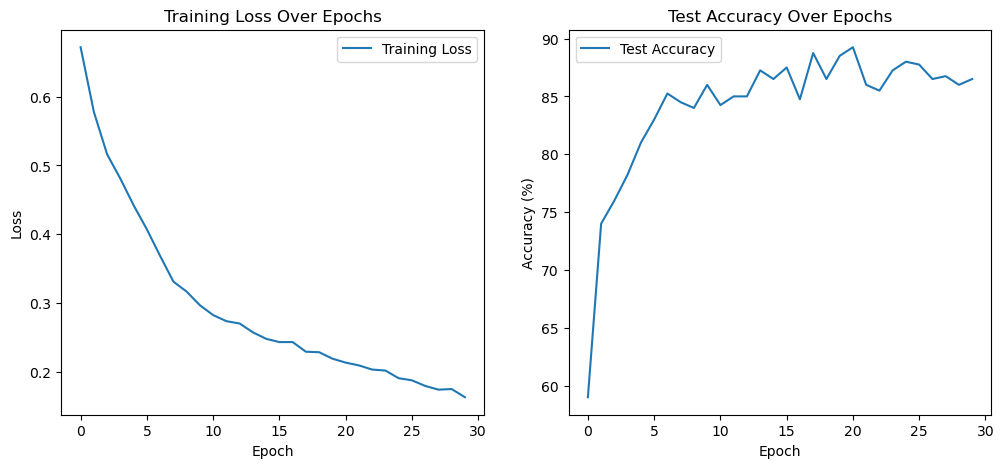

In [63]:
# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()